## Lending Club Case Study

## Problem Statement
##### The data given below contains information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

##### The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.


In [3]:
## import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#Importing the dataset
ld = pd.read_csv(r"C:\Users\abhis\Documents\IIITB\Class1\lending loan case study\loan.csv",low_memory=False)
ld.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [6]:
# Getting the number of rows and columns
ld.shape

(39717, 111)

In [7]:
# Missing Value Check

100*ld.isnull().sum()/ld.shape[0]

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

### In the above we can see lot of variables with missing values which we can't keep in our analysis hence we are going to remove them

In [8]:


# First we need to identify the number of columns which are having the missig values

ld_clean = ld.dropna(axis=1, how='all')

In [9]:
# Again checking the missing values to see how many more columns have the missing values

100*ld_clean.isnull().mean()

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.585543
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [12]:
# We can see still lot of columns is having the missing values which are mentioned below:

## next_pymnt_d,mths_since_last_record,mths_since_last_delinq,desc,emp_title,emp_length,pub_rec_bankruptcies,last_pymnt_d,collections_12_mths_ex_med,chargeoff_within_12_mths,revol_util,tax_liens,title,last_credit_pull_d

## Out of these we are going to follow the below mentioned strategy

# (a) Columns having high percentage of missing values (>40% or 50%), directly discard that column from the analysis. 
# (b) Columns having missing values under acceptable range we prefer to impute them (replace with some values) 
# (c) For numerical columns we prefer to use mean or median.(Median is preferred) 
# (d) Median is not affected with the outliers. (Extreme values) 
# (e) For categorical columns we prefer to use mode.


## With the above approach we can remove the below mentioned columns since they have more than 50% missing values

cols_to_drop = ['next_pymnt_d','mths_since_last_record','mths_since_last_delinq']
ld_clean_dropped = ld_clean.drop(columns=cols_to_drop)


In [270]:
ld_clean_dropped.shape

(39717, 54)

In [17]:
## Lets find unique values in each column to understand if we can use the column in analysis or not

distinct_counts = ld_clean_dropped.nunique()

print("Number of distinct values in each column:")
print(distinct_counts)


Number of distinct values in each column:
id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26526
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line      

### Multiple columns have only single value which would not give any insights, hence we will remove them

In [271]:
cols_to_drop2 = ['collections_12_mths_ex_med','policy_code','application_type','acc_now_delinq','chargeoff_within_12_mths',
                'delinq_amnt','tax_liens','initial_list_status','pymnt_plan']

ld_clean_dropped2 = ld_clean_dropped.drop(columns=cols_to_drop2)

In [272]:
ld_clean_dropped2.shape

(39717, 45)

### The goal of the analysis is to identify borrowers who are likely to default, which can only be determined for loans that are either fully paid or charged off. Since we cannot draw conclusions from loans that are currently active, we will exclude those records by removing entries with a current loan status.

In [31]:
loan_data = ld_clean_dropped2[ld_clean_dropped2.loan_status != "Current"]
ld_clean_dropped2.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [27]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       38577 non-null  int64  
 1   member_id                38577 non-null  int64  
 2   loan_amnt                38577 non-null  int64  
 3   funded_amnt              38577 non-null  int64  
 4   funded_amnt_inv          38577 non-null  float64
 5   term                     38577 non-null  object 
 6   int_rate                 38577 non-null  object 
 7   installment              38577 non-null  float64
 8   grade                    38577 non-null  object 
 9   sub_grade                38577 non-null  object 
 10  emp_title                36191 non-null  object 
 11  emp_length               37544 non-null  object 
 12  home_ownership           38577 non-null  object 
 13  annual_inc               38577 non-null  float64
 14  verification_status      38

## We see few of columns are those which shows will be required to see the post loan approval, hence we would not need them so we are going the remove them
##### These columns are mentioned as 
##### delinq_2yrs,revol_bal,out_prncp,total_pymnt ,total_rec_prncp , total_rec_int ,total_rec_late_fee ,recoveries ,collection_recovery_fee ,last_pymnt_d ,last_pymnt_amnt ,next_pymnt_d ,chargeoff_within_12_mths ,mths_since_last_delinq,mths_since_last_record



In [71]:
# Lets remove the above columns

loan_data2 = loan_data.drop(["id", "member_id", "url", "title", "emp_title", "zip_code", 
                "last_credit_pull_d", "addr_state","desc","out_prncp_inv",
                "total_pymnt_inv","funded_amnt", "delinq_2yrs", "revol_bal", 
                "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", 
                "total_rec_late_fee", "recoveries", "collection_recovery_fee", 
                "last_pymnt_d", "last_pymnt_amnt"], axis = 1)

In [34]:
loan_data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   funded_amnt_inv       38577 non-null  float64
 2   term                  38577 non-null  object 
 3   int_rate              38577 non-null  object 
 4   installment           38577 non-null  float64
 5   grade                 38577 non-null  object 
 6   sub_grade             38577 non-null  object 
 7   emp_length            37544 non-null  object 
 8   home_ownership        38577 non-null  object 
 9   annual_inc            38577 non-null  float64
 10  verification_status   38577 non-null  object 
 11  issue_d               38577 non-null  object 
 12  loan_status           38577 non-null  object 
 13  purpose               38577 non-null  object 
 14  dti                   38577 non-null  float64
 15  earliest_cr_line      38

In [45]:
# Since now we have now relevant variable lets fill the missing values with the relevant information

loan_data2.emp_length.mode()[0]

'10+ years'

In [72]:
mod = loan_data2.emp_length.mode()[0]

loan_data2["emp_length"]=loan_data2["emp_length"].fillna(mod)

In [47]:
100*loan_data2.isnull().mean()

loan_amnt               0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_length              0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
dti                     0.000000
earliest_cr_line        0.000000
inq_last_6mths          0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_util              0.129611
total_acc               0.000000
pub_rec_bankruptcies    1.806776
dtype: float64

In [48]:
loan_data2.revol_util.mode()[0]

'0%'

In [73]:
mod2 = loan_data2.revol_util.mode()[0]

loan_data2["revol_util"]=loan_data2["revol_util"].fillna(mod2)

In [74]:
med1 = loan_data2.pub_rec_bankruptcies.median()

loan_data2["pub_rec_bankruptcies"]=loan_data2["pub_rec_bankruptcies"].fillna(med1)

In [58]:
100*loan_data2.isnull().mean()

loan_amnt               0.0
funded_amnt_inv         0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
sub_grade               0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
dti                     0.0
earliest_cr_line        0.0
inq_last_6mths          0.0
open_acc                0.0
pub_rec                 0.0
revol_util              0.0
total_acc               0.0
pub_rec_bankruptcies    0.0
dtype: float64

#### Now we can see there are no missing values, but we have observed that there are variables which seems to be numeric but they are shown as object hence we will convert them to numeric




In [75]:
loan_data2['revol_util'] = loan_data2['revol_util'].str.rstrip('%').astype('float') / 100.0

In [76]:
print(loan_data2.revol_util)

0        0.837
1        0.094
2        0.985
3        0.210
5        0.283
         ...  
39712    0.131
39713    0.269
39714    0.194
39715    0.007
39716    0.515
Name: revol_util, Length: 38577, dtype: float64


In [77]:
print(loan_data2.int_rate)

0        10.65%
1        15.27%
2        15.96%
3        13.49%
5         7.90%
          ...  
39712     8.07%
39713    10.28%
39714     8.07%
39715     7.43%
39716    13.75%
Name: int_rate, Length: 38577, dtype: object


In [78]:
loan_data2['int_rate'] = loan_data2['int_rate'].str.rstrip('%').astype('float') / 100.0

In [79]:
print(loan_data2.int_rate)

0        0.1065
1        0.1527
2        0.1596
3        0.1349
5        0.0790
          ...  
39712    0.0807
39713    0.1028
39714    0.0807
39715    0.0743
39716    0.1375
Name: int_rate, Length: 38577, dtype: float64


In [80]:
print(loan_data2.emp_length)

0        10+ years
1         < 1 year
2        10+ years
3        10+ years
5          3 years
           ...    
39712      4 years
39713      3 years
39714     < 1 year
39715     < 1 year
39716     < 1 year
Name: emp_length, Length: 38577, dtype: object


In [81]:
# Custom function to convert experience to numeric values
def convert_experience_to_numeric(emp_l):
    if emp_l == '10+ years':
        return 10
    elif emp_l == '< 1 year':
        return 0.5
    else:
        return float(emp_l.split()[0])

# Apply the custom function to the 'emp_length' column
loan_data2['emp_length'] = loan_data2['emp_length'].apply(convert_experience_to_numeric)

In [82]:
print(loan_data2.emp_length)

0        10.0
1         0.5
2        10.0
3        10.0
5         3.0
         ... 
39712     4.0
39713     3.0
39714     0.5
39715     0.5
39716     0.5
Name: emp_length, Length: 38577, dtype: float64


In [83]:
loan_data2.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies
0,5000,4975.0,36 months,0.1065,162.87,B,B2,10.0,RENT,24000.0,...,Fully Paid,credit_card,27.65,Jan-85,1,3,0,0.837,9,0.0
1,2500,2500.0,60 months,0.1527,59.83,C,C4,0.5,RENT,30000.0,...,Charged Off,car,1.00,Apr-99,5,3,0,0.094,4,0.0
2,2400,2400.0,36 months,0.1596,84.33,C,C5,10.0,RENT,12252.0,...,Fully Paid,small_business,8.72,Nov-01,2,2,0,0.985,10,0.0
3,10000,10000.0,36 months,0.1349,339.31,C,C1,10.0,RENT,49200.0,...,Fully Paid,other,20.00,Feb-96,1,10,0,0.210,37,0.0
5,5000,5000.0,36 months,0.0790,156.46,A,A4,3.0,RENT,36000.0,...,Fully Paid,wedding,11.20,Nov-04,3,9,0,0.283,12,0.0


In [84]:
loan_data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   funded_amnt_inv       38577 non-null  float64
 2   term                  38577 non-null  object 
 3   int_rate              38577 non-null  float64
 4   installment           38577 non-null  float64
 5   grade                 38577 non-null  object 
 6   sub_grade             38577 non-null  object 
 7   emp_length            38577 non-null  float64
 8   home_ownership        38577 non-null  object 
 9   annual_inc            38577 non-null  float64
 10  verification_status   38577 non-null  object 
 11  issue_d               38577 non-null  object 
 12  loan_status           38577 non-null  object 
 13  purpose               38577 non-null  object 
 14  dti                   38577 non-null  float64
 15  earliest_cr_line      38

<Axes: ylabel='loan_amnt'>

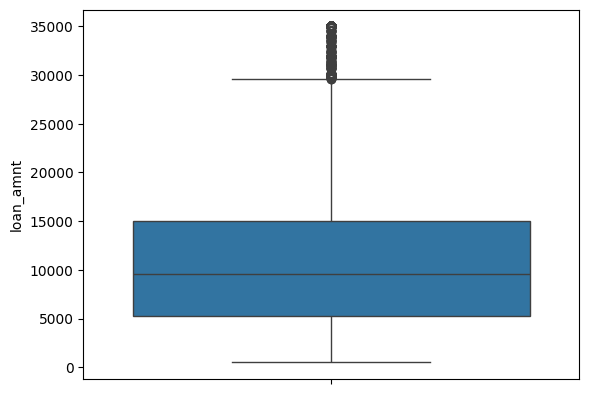

In [104]:
## Now lets see if we have outlier in loan amount variable
sns.boxplot(loan_data2['loan_amnt'])



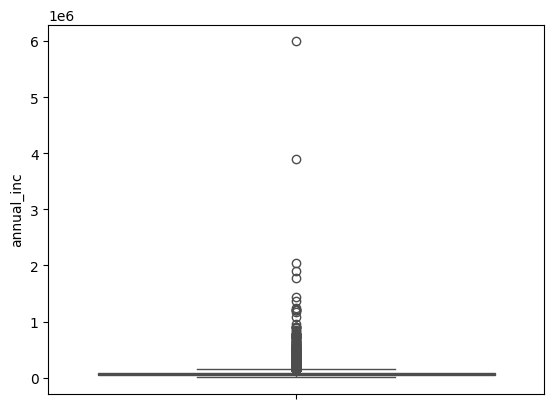

In [274]:
## Now lets see if we have outlier in annual_inc variable which shows the annual income

sns.boxplot(loan_data2['annual_inc'])
plt.show()

In [106]:
## In the above plot for annual_inc we can clearly see there are outliers in the data, hence we will understand them and remove the outliers

loan_data2["annual_inc"].describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [107]:
loan_data2.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])

0.50     58868.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234144.0
Name: annual_inc, dtype: float64

In [108]:
## The values after 95 percentile seems to be disconected from the general distribution and also there is huge increase in the value for small quantile variation.

per_95_annual_inc = loan_data2['annual_inc'].quantile(0.95)
loan_data3 = loan_data2[loan_data2.annual_inc <= per_95_annual_inc]

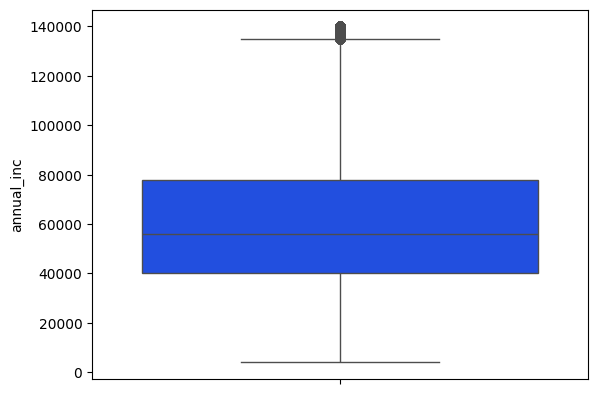

In [275]:
sns.boxplot(loan_data3.annual_inc)
plt.show()

#### Now we have covered two variable which seems to be fine after removing the outliers from annual_inc. Lets explore other variables

## Below mentioned are the numerical variables

### loan_amnt ,annual_inc

,funded_amnt_inv
,int_rate
,installment
,emp_length
,dti
,revol_util
,pub_rec_bankruptcies






<Axes: ylabel='funded_amnt_inv'>

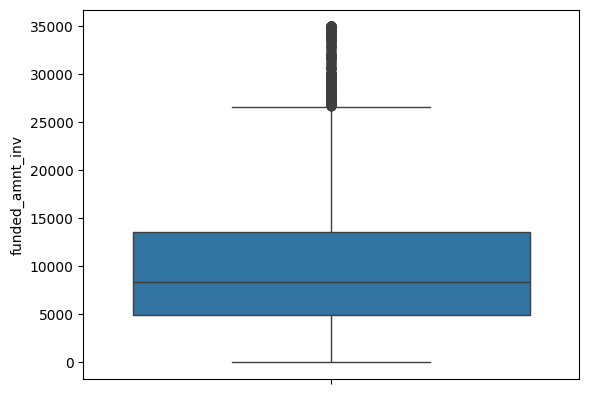

In [110]:
sns.boxplot(loan_data3.funded_amnt_inv)

In [111]:
## Lets plot all the numerical variables in box plot using for loop:

num_cols= ['funded_amnt_inv'
,'int_rate'
,'installment'
,'emp_length'
,'dti'
,'revol_util'
,'pub_rec_bankruptcies']

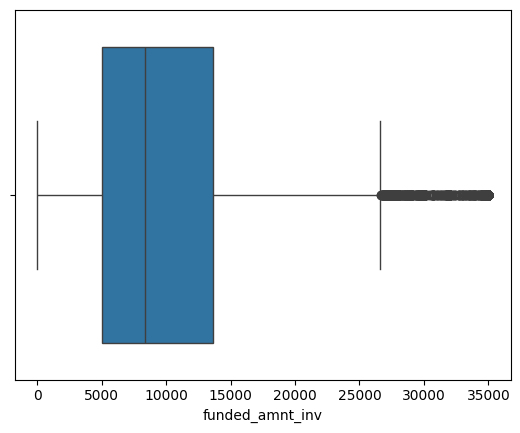

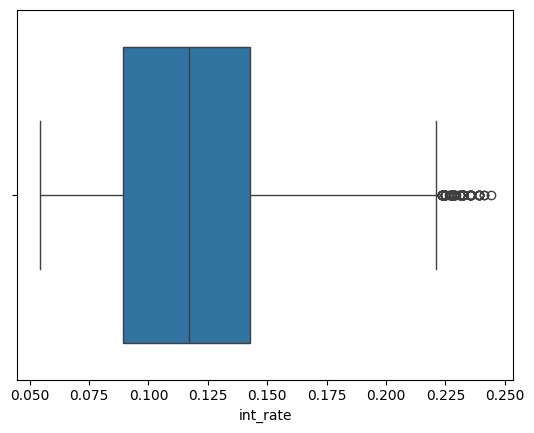

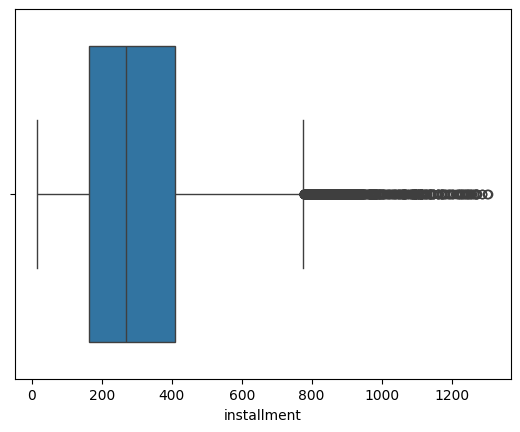

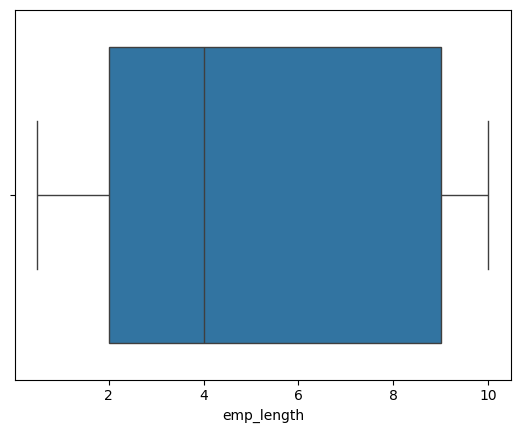

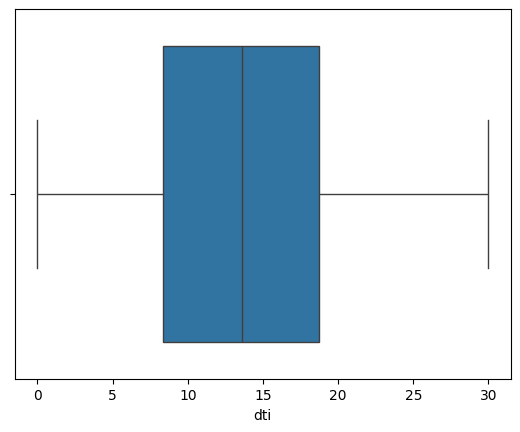

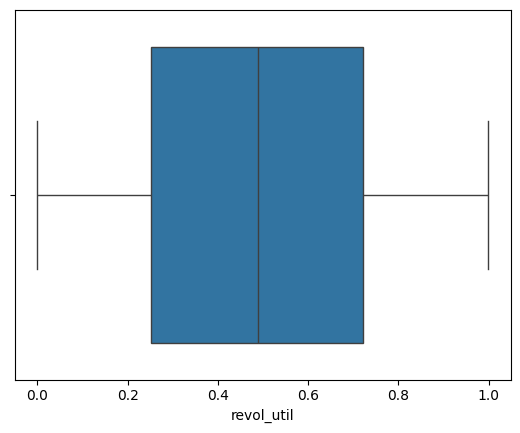

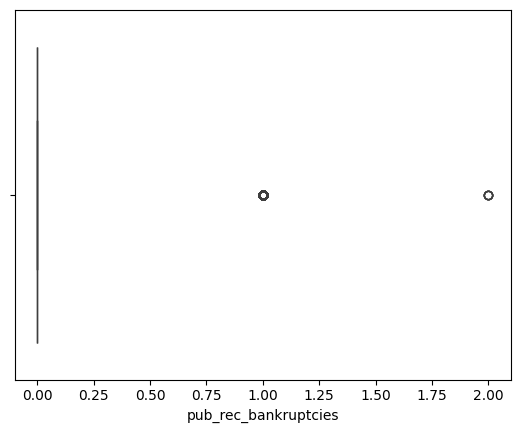

In [112]:
for col in num_cols:
    sns.boxplot(x=loan_data3[col])
    plt.show()

In [113]:
## We can clearly see all the numerical variables seems to be fine except 'pub_rec_bankruptcies' which has most of the values around 0 
## lets deep dive into this

loan_data3.pub_rec_bankruptcies.quantile([0.5,0.75,0.90,0.95,0.97,0.975, 0.98,0.985, 0.99, 1.0])


0.500    0.0
0.750    0.0
0.900    0.0
0.950    0.0
0.970    1.0
0.975    1.0
0.980    1.0
0.985    1.0
0.990    1.0
1.000    2.0
Name: pub_rec_bankruptcies, dtype: float64

In [114]:
## We can clearly see that more than 95 percent of values have 0 hence this variable is not going to be any use for us hence its better to remove from the dataframe.
loan_data4 = loan_data3.drop(['pub_rec_bankruptcies'], axis = 1)


In [115]:
loan_data4.describe()

,loan_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
count,36654.000000,36654.000000,36654.000000,36654.000000,36654.000000,36654.000000,36654.000000,36654.000000,36654.000000,36654.000000,36654.00000,36654.000000
mean,10682.249550,9894.181349,0.118881,311.888682,5.101421,60855.751621,13.446725,0.864108,9.167294,0.056829,0.48596,21.641349
std,7048.414166,6730.756232,0.036673,199.230096,3.515837,27750.284125,6.661899,1.064146,4.353165,0.240307,0.28319,11.232836
min,500.000000,0.000000,0.054200,15.690000,0.500000,4000.000000,0.000000,0.000000,2.000000,0.000000,0.00000,2.000000
25%,5000.000000,4975.000000,0.089400,163.080000,2.000000,40000.000000,8.350000,0.000000,6.000000,0.000000,0.25200,13.000000
50%,9250.000000,8375.000000,0.117100,270.420000,4.000000,56000.000000,13.580000,1.000000,8.000000,0.000000,0.48900,20.000000
75%,15000.000000,13623.731415,0.142700,408.480000,9.000000,77970.500000,18.710000,1.000000,12.000000,0.000000,0.72100,28.000000
max,35000.000000,35000.000000,0.244000,1305.190000,10.000000,140004.000000,29.990000,8.000000,44.000000,4.000000,0.99900,90.000000


In [116]:
loan_data4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36654 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            36654 non-null  int64  
 1   funded_amnt_inv      36654 non-null  float64
 2   term                 36654 non-null  object 
 3   int_rate             36654 non-null  float64
 4   installment          36654 non-null  float64
 5   grade                36654 non-null  object 
 6   sub_grade            36654 non-null  object 
 7   emp_length           36654 non-null  float64
 8   home_ownership       36654 non-null  object 
 9   annual_inc           36654 non-null  float64
 10  verification_status  36654 non-null  object 
 11  issue_d              36654 non-null  object 
 12  loan_status          36654 non-null  object 
 13  purpose              36654 non-null  object 
 14  dti                  36654 non-null  float64
 15  earliest_cr_line     36654 non-null  obje

## Lets explore the categorical variables

In [210]:
cat_cols= ['term','grade','sub_grade','home_ownership','verification_status','loan_status']

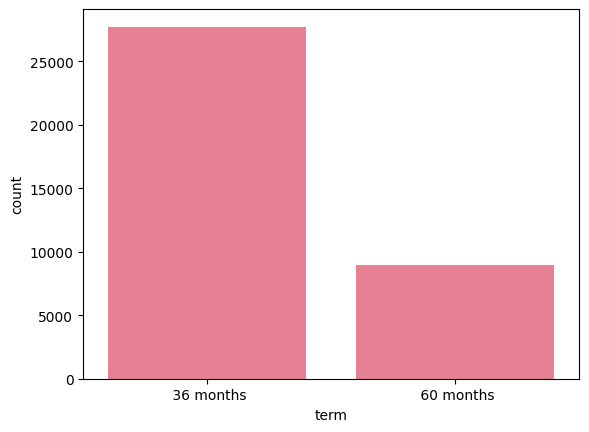

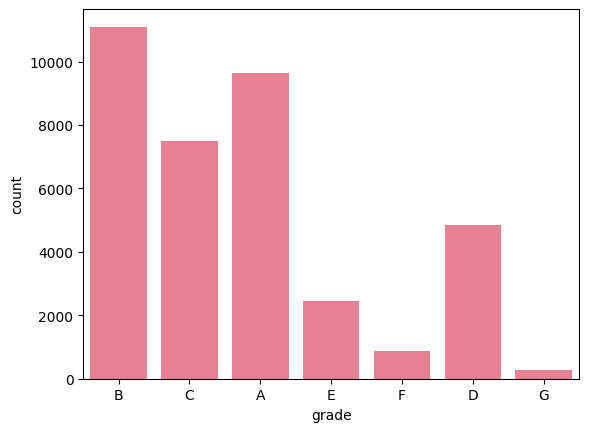

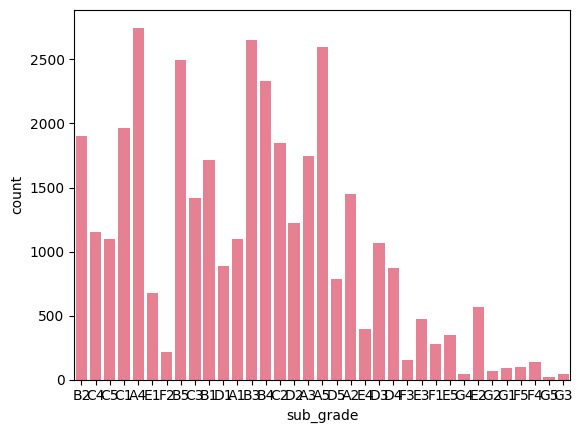

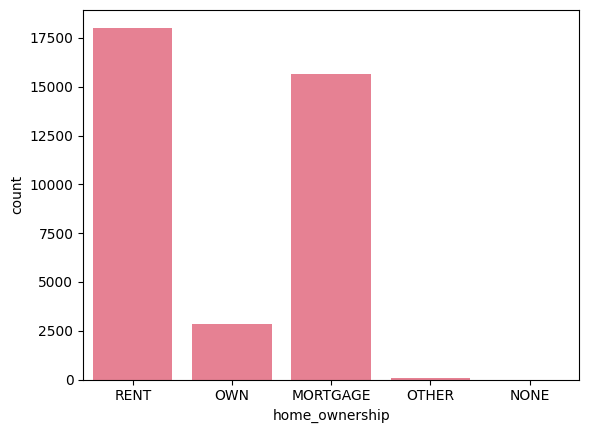

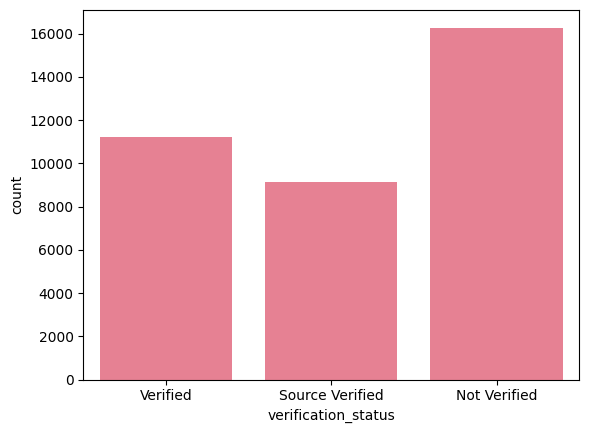

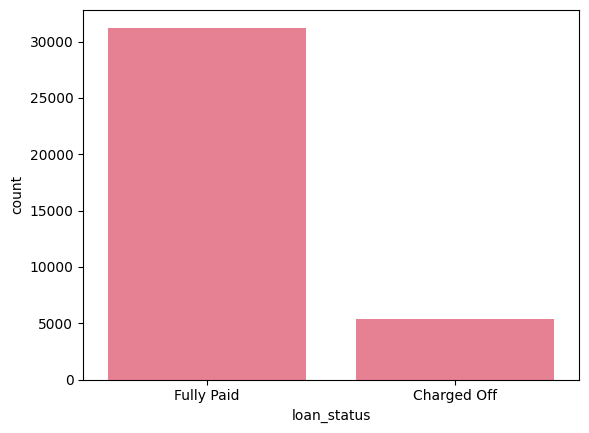

In [211]:
## Lets plot all the categorical variables

for col in cat_cols:
    sns.countplot(x=loan_data4[col])
    plt.show()

#### In the above graphs we can't read the sub grade hence lets first fix that for which we might have to exract the values for the grade from sub grade which might solve this issue

In [132]:
loan_data4['sub_grade1'] = loan_data4['sub_grade'].apply(lambda x: int(''.join(filter(str.isdigit, x))))

In [133]:
print(loan_data4['sub_grade1'])

0        2
1        4
2        5
3        1
5        4
        ..
39711    1
39712    4
39713    1
39714    4
39716    2
Name: sub_grade1, Length: 36654, dtype: int64


## We can see that approx 5K are charged off hence that should be our target CM's and lets understand their data

In [ ]:
## Now lets plot the grade with subgrade on loan status to get meaningful insight

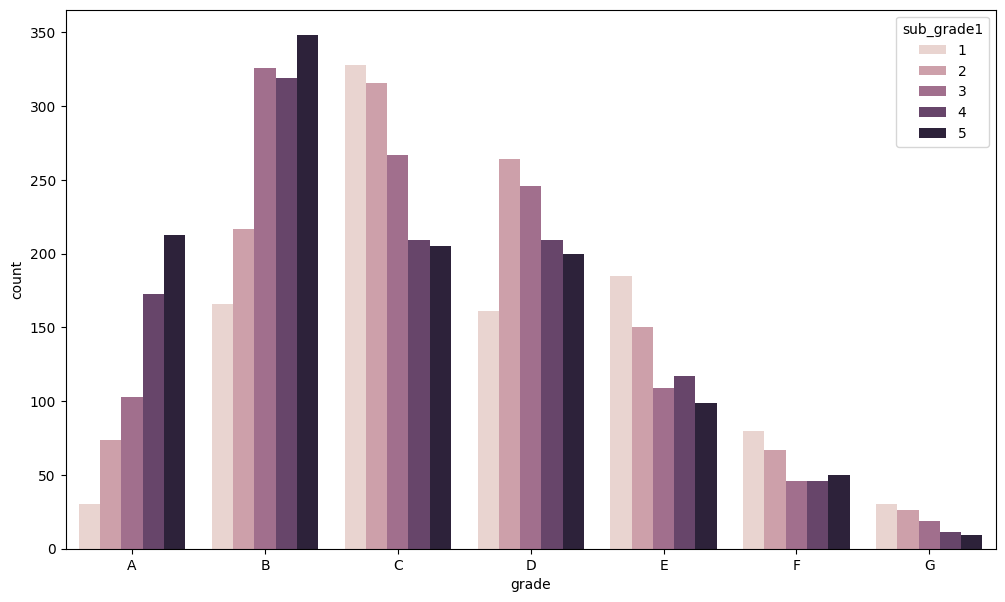

In [273]:
fig, ax = plt.subplots(figsize=(12,7))
sns.set_palette('bright')
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade1',data = loan_data4[loan_data4.loan_status == 'Charged Off'])
plt.show()

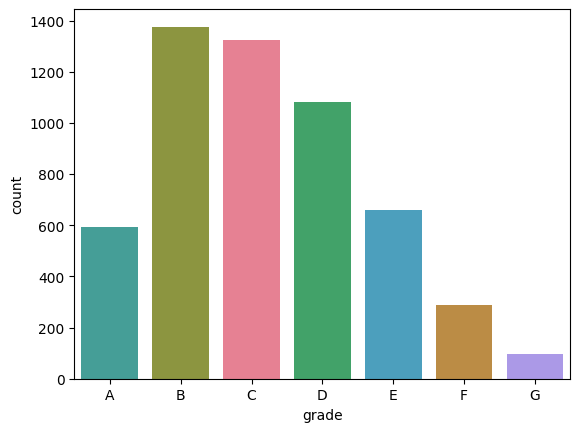

In [157]:
sns.countplot(x = 'grade', data = loan_data4[loan_data4.loan_status == 'Charged Off'], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'],hue = 'grade')
plt.show()

In [155]:
palette = sns.color_palette("husl", 8)  # Using the 'husl' color palette with 8 colors

# Apply the color palette
sns.set_palette(palette)

### Analyzing the purpose of loan

Which shows debt_consolidation is having the maximum number of CM's

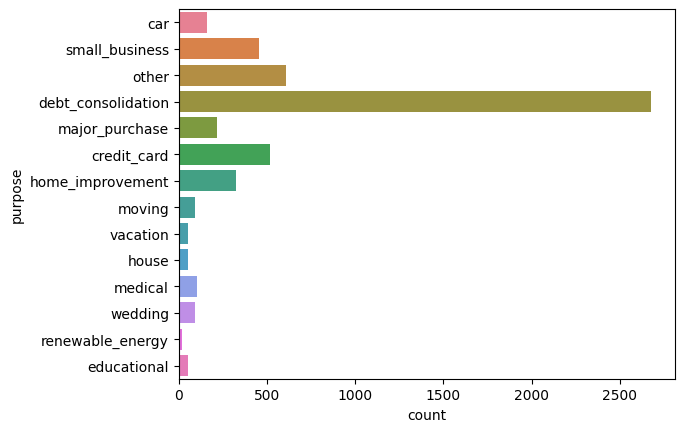

In [156]:
sns.countplot(y ='purpose', data=loan_data4[loan_data4.loan_status == 'Charged Off'],hue = "purpose")
plt.show()

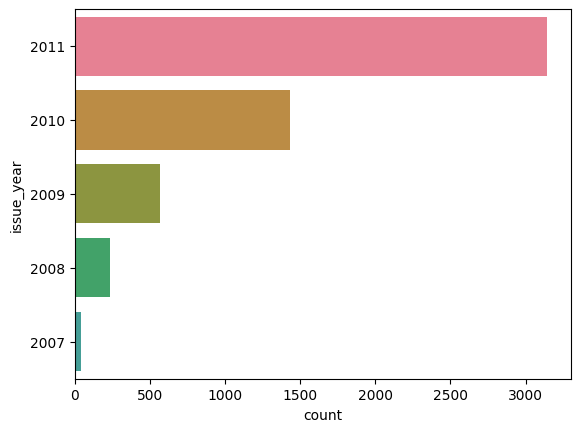

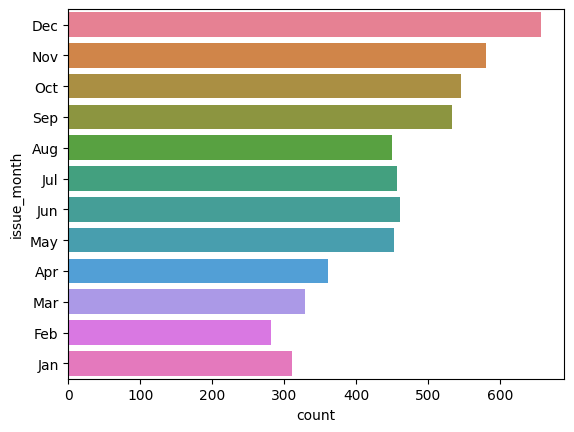

In [159]:
## Extracting month and year from issue_d and plotting the graph
df_month_year = loan_data4['issue_d'].str.partition("-", True)     
loan_data4['issue_month']=df_month_year[0]                       
loan_data4['issue_year']='20' + df_month_year[2]

sns.countplot(y ='issue_year', data=loan_data4[loan_data4.loan_status == 'Charged Off'],hue = 'issue_year')
plt.show()

sns.countplot(y ='issue_month', data=loan_data4[loan_data4.loan_status == 'Charged Off'],hue = 'issue_month')
plt.show()

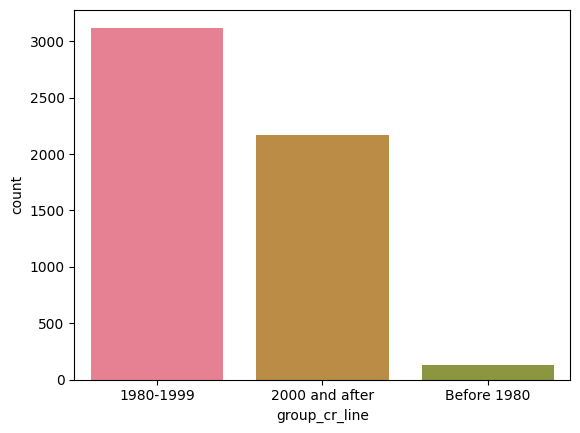

In [182]:
## Extracting month and year from issue_d and plotting the graph
df_month_year = loan_data4['earliest_cr_line'].str.partition("-", True)     
loan_data4['ecl_month']=df_month_year[0]                       
loan_data4['ecl_year']=df_month_year[2]

loan_data4['ecl_year'] = loan_data4['ecl_year'].astype(int).apply(lambda x: 1900 + x if x > 50 else 2000 + x)

loan_data4['group_cr_line'] = np.where(loan_data4['ecl_year'] < 1980, 'Before 1980',
                       np.where(loan_data4['ecl_year'] < 2000, '1980-1999', '2000 and after'))

sns.countplot(x ='group_cr_line', data=loan_data4[loan_data4.loan_status == 'Charged Off'],hue = 'group_cr_line')
plt.show()

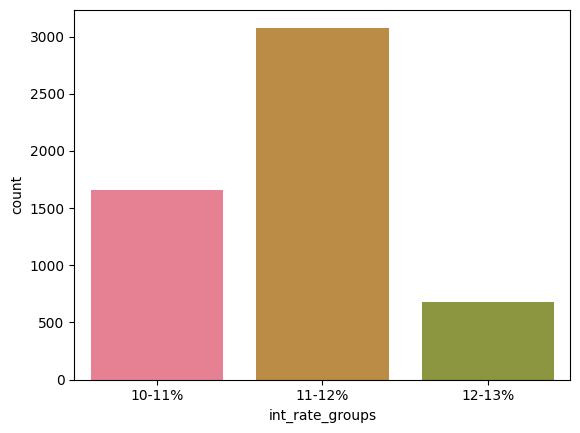

In [187]:
## Now lets see the intrest rates effect on deliquecy

loan_data4['int_rate_groups'] = pd.cut(loan_data4['int_rate'], bins=3,precision =0,labels= ['10-11%', '11-12%', '12-13%'])

sns.countplot(x ='int_rate_groups', data=loan_data4[loan_data4.loan_status == 'Charged Off'],hue = 'int_rate_groups')
plt.show()

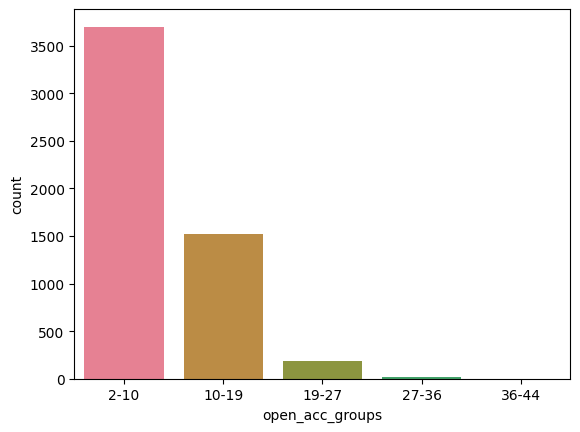

In [189]:
## Lets see number of open accts

loan_data4['open_acc_groups'] = pd.cut(loan_data4['open_acc'],bins = 5,precision =0,labels=['2-10','10-19','19-27','27-36','36-44'])


sns.countplot(x ='open_acc_groups', data=loan_data4[loan_data4.loan_status == 'Charged Off'],hue = 'open_acc_groups')
plt.show()


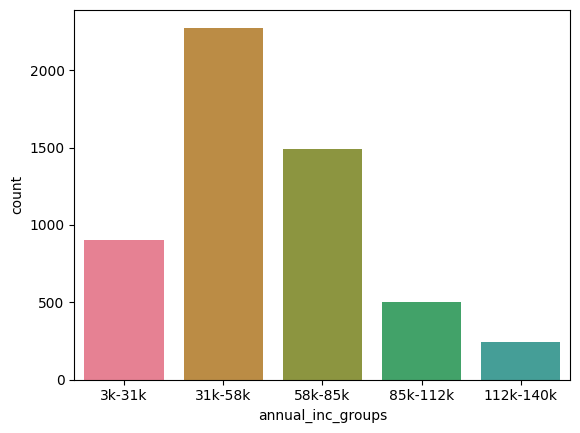

In [190]:
## Lets see annual income group effect

loan_data4['annual_inc_groups'] = pd.cut(loan_data4['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])

sns.countplot(x ='annual_inc_groups', data=loan_data4[loan_data4.loan_status == 'Charged Off'],hue = 'annual_inc_groups')
plt.show()

# Bivariate Analysis

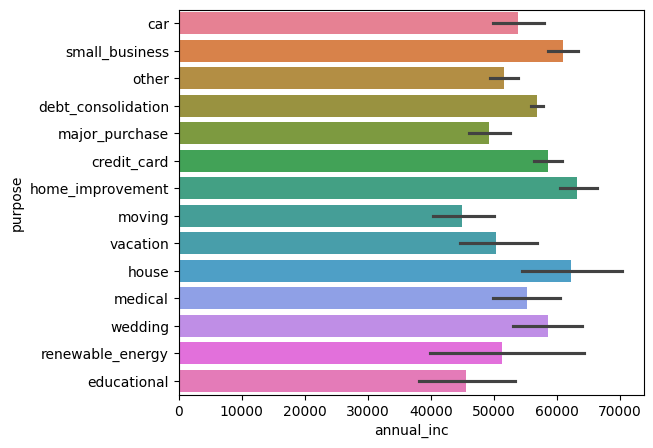

In [283]:
# For Bivariate we can select annual_inc_groups vs other variables
plt.figure(figsize =(6,5))
sns.barplot(data =loan_data4[loan_data4.loan_status == 'Charged Off'],x='annual_inc', y='purpose', hue ='purpose',legend = False)
plt.show()

#### So we saw the debt consolidation was higest when we see it individually but if we combine that with annual income it does not show these group have high annual income
#### Also above graph show the person who is having the high income they usually apply for home improvement ,house or small business who tends to default


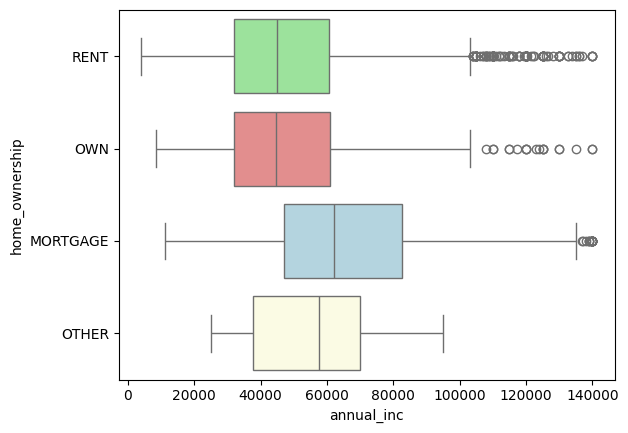

In [208]:
df1 = loan_data4[loan_data4.loan_status == 'Charged Off']

# Define custom colors for each category
custom_palette = {
    'MORTGAGE': 'lightblue',
    'RENT': 'lightgreen',
    'OWN': 'lightcoral',
    'OTHER': 'lightyellow'
}

# Create a box plot with custom colors
sns.boxplot(x="annual_inc", y="home_ownership", data=df1, hue = "home_ownership" ,palette=custom_palette)
plt.show()

###  We can clearly see people who have high annual income since median is around 60K either have Mortgage or other


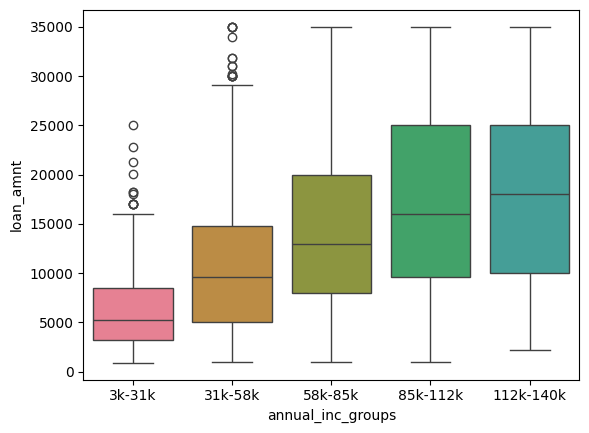

In [219]:
## Lets compare Loan amount with Annual Income


sns.boxplot(x = "annual_inc_groups", y = "loan_amnt", hue = 'annual_inc_groups', data = df1)
plt.show()

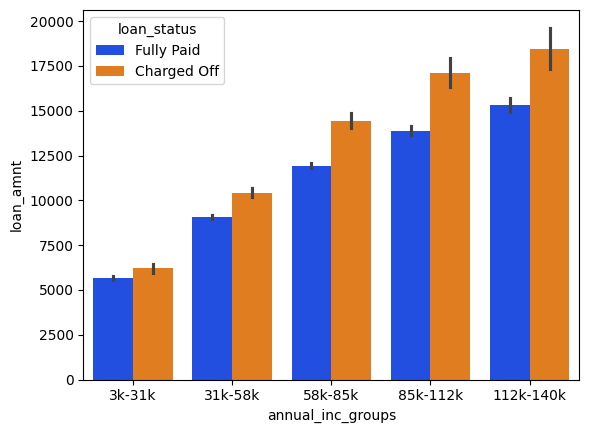

In [278]:
### We can clearly see in above graph that whose annual income is higher tend to get higher loan amount but it would be good to see if this groups is defaulting the most

sns.barplot(x = "annual_inc_groups", y = "loan_amnt", hue = 'loan_status', data = loan_data4)
plt.show()

### By the above two graphs we can clearly see that across all the income groups, the loan_amount is higher for people who defaulted.

## Now lets see whats impact of int_rate on loan amount

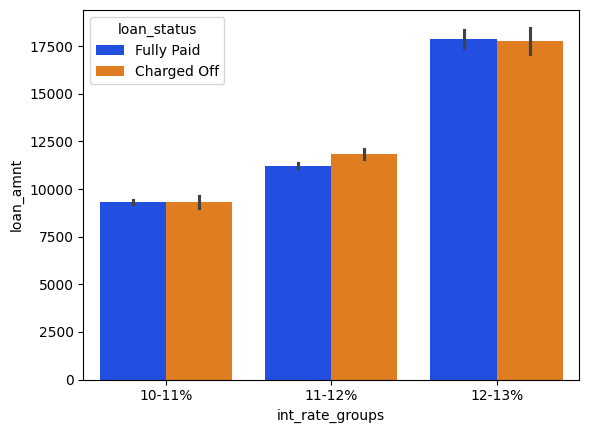

In [277]:
sns.barplot(x = "int_rate_groups", y = "loan_amnt", hue = 'loan_status', data = loan_data4)
plt.show()

## Interest rate vs Loan amount

In [237]:
## Creating the groups for loan amonnt so that we could showcase the data properly

loan_data4['loan_amnt_groups'] = pd.cut(loan_data4['loan_amnt'], 
                                        bins=5,precision =0,
                                        labels=['0-7k','8k-14k','15k-21k','22k-28k','29k-35k'])



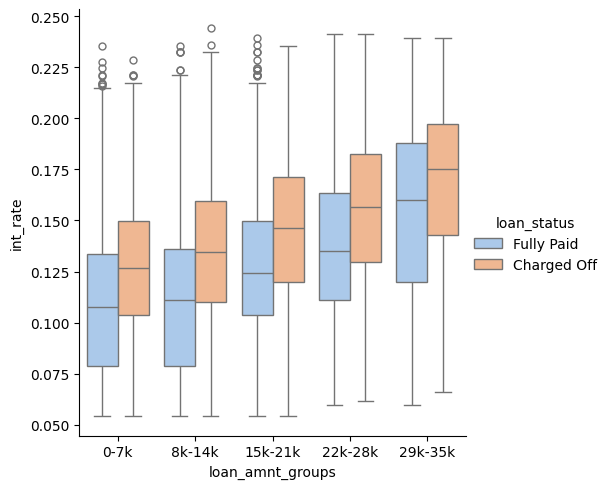

In [249]:
## Plotting the graph
sns.catplot(data =loan_data4,y ='int_rate', x ='loan_amnt_groups', hue ='loan_status',palette="pastel",kind = 'box')
plt.show()

### The interest rate for charged off loans is pretty high than that of fully paid loans in all the loan_amount groups.


#### Here we can clearly see whose Interest rate is most they tend to default 

## Now lets plot a graph between revolve utilization and annual Income 

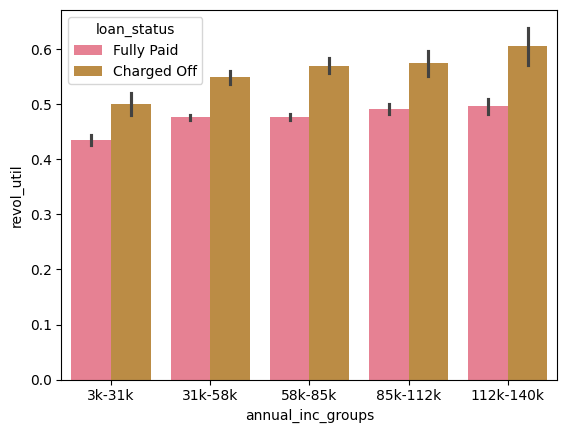

In [254]:
sns.barplot(x = "annual_inc_groups", y = "revol_util", hue = 'loan_status', data = loan_data4)
plt.show()

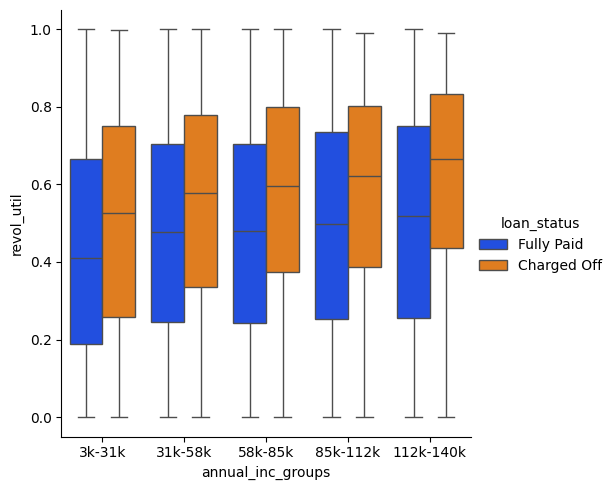

In [257]:
sns.catplot(data =loan_data4,y ='revol_util', x ='annual_inc_groups', hue ='loan_status',palette="bright",kind = 'box')
plt.show()

#### Here we can see applicants who relove there amount more are tend default

In [261]:
## Lets plot a graph annual income vs installment to understand the relevance

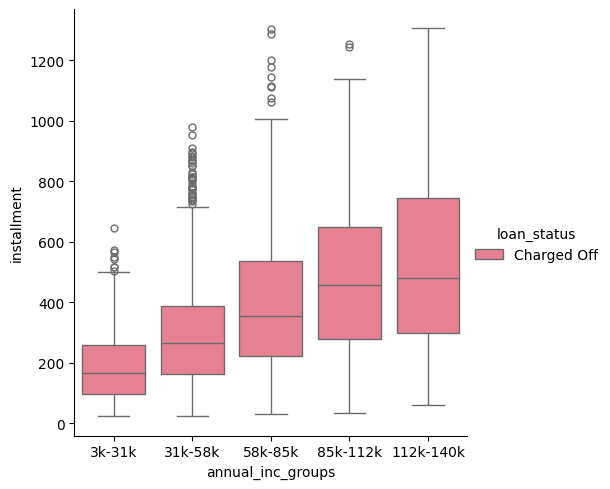

In [269]:
sns.catplot(data =df1,y ='installment', x ='annual_inc_groups', hue ='loan_status',palette="husl",kind = 'box')
plt.show()

### Above graph clearly states that higher emi might lead to default on loan

## Observations:

## There is a more probability of defaulting when:

## Univariate Analysis:

##### Applicants who use the loan to clear other debts
##### Applicants who have taken short term loan that is around 36
##### Applicants whose grade is B and subgrade is 5
##### Applicants who have applied in 2011 and month Dec 
##### Applicants who have credit line between 1980 to 1999
##### Applicants whose interest rate is between 11% to 12%
##### Applicants who have just 2- 10 open credit lines
##### Applicants who have income between 31 to 58
##### Applicants whose income source is not verified


## Bivariate Analysis

### There is a more probability of defaulting when:

##### Applicant have high annual income since median is around 60K either have Mortgage or other house ownership
##### Applicant having the high income they usually apply for home improvement ,house or small business 
##### Applicant who is having the higher annual income and gettting high loan amount 
##### Appliant whose rate of interest is very high as compared to the interest of the applicants who have fully paid the loan
##### Applicant who revolve the spend amount more
##### Applicant who is having the higher installment amount



